In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

In [2]:
base_dir = 'C:/Users/yoon/OCR/ID_image'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 O/X 이미지 경로
train_o_dir = os.path.join(train_dir, 'O')
train_x_dir = os.path.join(train_dir, 'X')
print(train_o_dir, train_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir = os.path.join(validation_dir, 'O')
validation_x_dir = os.path.join(validation_dir, 'X')
print(validation_o_dir, validation_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir = os.path.join(test_dir, 'O')
test_x_dir = os.path.join(test_dir, 'X')
print(test_o_dir, test_x_dir)

C:/Users/yoon/OCR/ID_image\train\O C:/Users/yoon/OCR/ID_image\train\X
C:/Users/yoon/OCR/ID_image\validation\O C:/Users/yoon/OCR/ID_image\validation\X
C:/Users/yoon/OCR/ID_image\test\O C:/Users/yoon/OCR/ID_image\test\X


In [3]:
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)

['12.jpg', '13.jpg', '15.jpg', '201407131657_61110008501436_1.jpg', '2e78cccba74d5c578929134aba0bf5dd.jpg', '52617a2d8df693.png', 'htm_20150602111748c010c011.jpg', 'KakaoTalk_20220525_165518515.jpg', 'KakaoTalk_20220525_165518515_01.jpg', 'KakaoTalk_20220525_165518515_03.jpg', 'KakaoTalk_20220525_165518515_04.jpg', 'KakaoTalk_20220525_165518515_05.jpg', 'KakaoTalk_20220525_165518515_07.jpg', 'KakaoTalk_20220525_165518515_09.jpg', 'KakaoTalk_20220525_173340750.jpg', 'KakaoTalk_20220525_173340750_02.jpg', 'KakaoTalk_20220525_173340750_03.jpg', 'KakaoTalk_20220525_173340750_04.jpg', 'KakaoTalk_20220525_173340750_05.jpg', 'KakaoTalk_20220525_173340750_06.jpg', 'KakaoTalk_20220525_173340750_07.jpg', 'KakaoTalk_20220525_173340750_08.jpg', 'KakaoTalk_20220525_173340750_09.jpg', 'KakaoTalk_20220525_173340750_10.jpg', 'KakaoTalk_20220525_173340750_11.jpg', 'KakaoTalk_20220525_173340750_12.jpg', 'KakaoTalk_20220525_173340750_14.jpg', 'KakaoTalk_20220525_204640107.jpg', 'KakaoTalk_20220525_204640

In [13]:
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))

print('Total validation o images :', len(os.listdir(validation_o_dir)))
print('Total validation x images :', len(os.listdir(validation_x_dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))

Total training o images : 78
Total training x images : 78
Total validation o images : 6
Total validation x images : 6
Total test o images : 22
Total test x images : 22


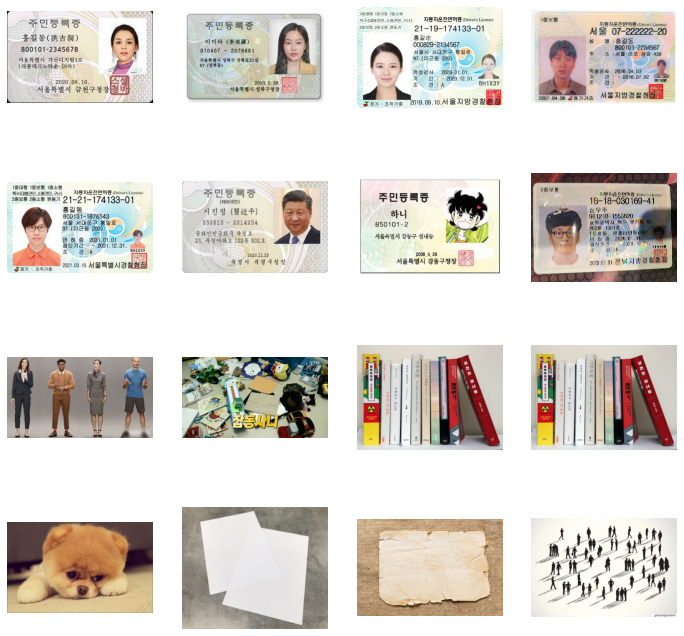

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [15]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기                                   
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=16, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
                                                    color_mode='grayscale', # 흑백 이미지 처리
                                                    class_mode='binary', 
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=4, 
                                                              color_mode='grayscale',
                                                              class_mode='binary', 
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(150,150))

Found 155 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [17]:
train_generator.class_indices

{'O': 0, 'X': 1}

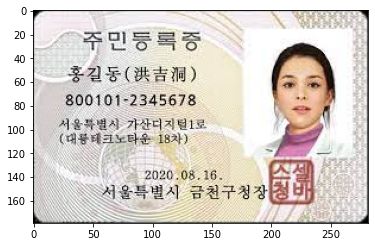

In [18]:
sample_img = mpimg.imread(next_o_pix[0])
plt.imshow(sample_img)
plt.show()

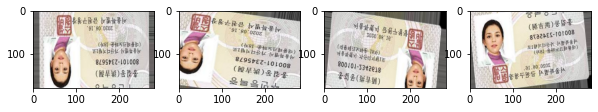

In [19]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [21]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])

In [22]:
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

C:\Users\yoon\AppData\Local\Temp\ipykernel_31248\2420823939.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/100
4/4 - 3s - loss: 0.9803 - accuracy: 0.5424 - val_loss: 0.6952 - val_accuracy: 0.5000 - 3s/epoch - 847ms/step
Epoch 2/100
4/4 - 2s - loss: 0.6768 - accuracy: 0.5625 - 2s/epoch - 406ms/step
Epoch 3/100
4/4 - 1s - loss: 0.6416 - accuracy: 0.5254 - 1s/epoch - 274ms/step
Epoch 4/100
4/4 - 1s - loss: 0.6982 - accuracy: 0.7188 - 1s/epoch - 302ms/step
Epoch 5/100
4/4 - 1s - loss: 0.6787 - accuracy: 0.6094 - 1s/epoch - 309ms/step
Epoch 6/100
4/4 - 1s - loss: 0.6288 - accuracy: 0.6406 - 1s/epoch - 348ms/step
Epoch 7/100
4/4 - 1s - loss: 0.5831 - accuracy: 0.6271 - 1s/epoch - 335ms/step
Epoch 8/100
4/4 - 1s - loss: 0.5650 - accuracy: 0.7288 - 1s/epoch - 313ms/step
Epoch 9/100
4/4 - 1s - loss: 0.5039 - accuracy: 0.6780 - 1s/epoch - 354ms/step
Epoch 10/100
4/4 - 1s - loss: 0.4940 - accuracy: 0.7288 - 1s/epoch - 350ms/step
Epoch 11/100
4/4 - 1s - loss: 0.5567 - accuracy: 0.6719 - 1s/epoch - 363ms/step
Epoch 12/100
4/4 - 1s - loss: 0.4103 - accuracy: 0.8305 - 1s/epoch - 351ms/step
Epoch 1

In [23]:
model.evaluate(train_generator)

10/10 [==============================] - 3s 251ms/step - loss: 0.1767 - accuracy: 0.9419


[0.17668405175209045, 0.9419354796409607]

In [24]:
model.evaluate(validation_generator)

3/3 [==============================] - 0s 33ms/step - loss: 0.1164 - accuracy: 0.9167


[0.11637146025896072, 0.9166666865348816]

1/1 [==============================] - 0s 19ms/step


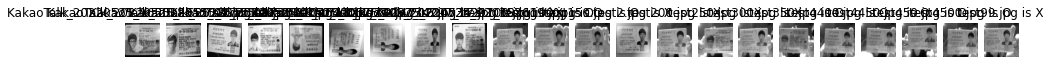

1/1 [==============================] - 0s 20ms/step


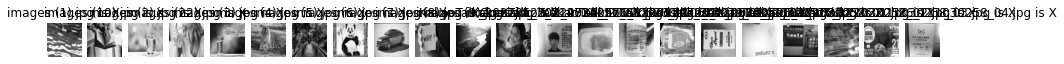

In [26]:
import numpy as np
from keras.preprocessing import image

# 테스트용 O 이미지 경로 설정
test_dir = 'C:/users/yoon/OCR/ID_image/test/'

test_o_dir = 'C:/users/yoon/OCR/ID_image/test/o'
test_o_filenames = os.listdir(test_o_dir)
test_o_filenames

# 테스트용 X 이미지 경로 설정

test_x_dir = 'C:/users/yoon/OCR/ID_image/test/x'
test_x_filenames = os.listdir(test_x_dir)
test_x_filenames

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames

# O/X 분류 테스트
for ox, filenames in dic_ox_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 1, 22
    for i, fn in enumerate(filenames):
        path = test_dir + ox + '/' + fn
        test_img = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')        
        x = tf.keras.preprocessing.image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)
        
        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            plt.title(fn + " is O")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')

        else:
            plt.title(fn + " is X")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();

In [27]:
model.evaluate(test_generator)

11/11 [==============================] - 1s 51ms/step - loss: 0.1719 - accuracy: 0.8864


[0.17193643748760223, 0.8863636255264282]

In [28]:
model.save('IDCARD_cnn.h5')